In [391]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
cmap = mpl.colormaps["jet"]
from matplotlib.ticker import ScalarFormatter

In [392]:
Nx, Ny = 7, 7
time = 12500
data = np.loadtxt("output/velocity_field_" + str(time) +
                  ".dat", dtype=np.float64)
x_grid = data[:, 0]
x_grid = x_grid.reshape(Nx, Ny)
y_grid = data[:, 1]
y_grid = y_grid.reshape(Nx, Ny)
ux = data[:, 2]
ux = ux.reshape(Nx, Ny)
uy = data[:, 3]
uy = uy.reshape(Nx, Ny)
data = np.loadtxt("output/density_field_" + str(time) +
                  ".dat", dtype=np.float64)
density = data[:, 2]
density = density.reshape(Nx, Ny)
pressure = data[:, 3]
pressure = pressure.reshape(Nx, Ny)
solid = data[:, 4]
solid = solid.reshape(Nx, Ny)

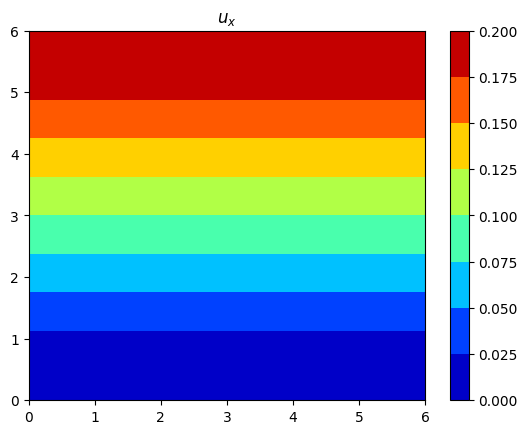

In [393]:
plt.figure(1)
plt.contourf(x_grid, y_grid, ux, cmap=cmap)
plt.colorbar()
plt.title(r"$u_x$")
plt.show()

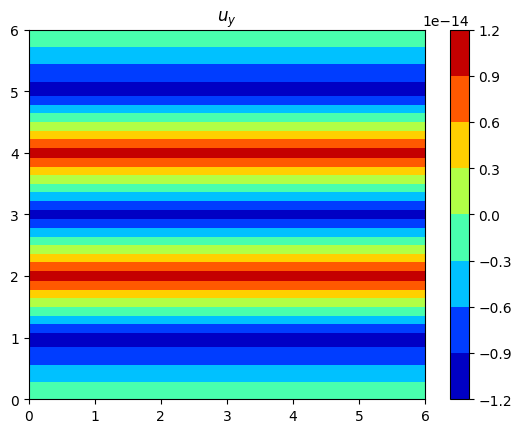

In [394]:
plt.figure(1)
plt.contourf(x_grid, y_grid, uy, cmap=cmap)
plt.colorbar()
plt.title("$u_y$")
plt.show()

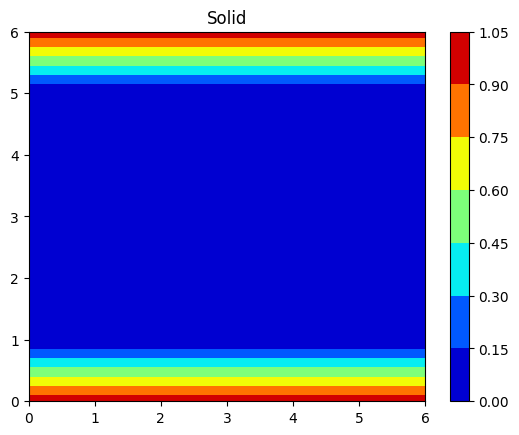

In [395]:
plt.figure(1)
plt.contourf(x_grid, y_grid, solid, cmap=cmap)
plt.colorbar()
plt.title("Solid")
plt.show()

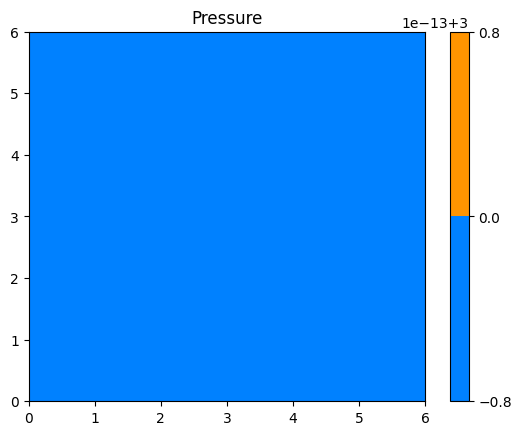

In [396]:
plt.figure(1)
plt.contourf(x_grid, y_grid, pressure, cmap=cmap)
plt.colorbar()
plt.title("Pressure")
plt.show()

# Comparison

In [397]:
u_plate = 0.2
H = 5
temp = np.linspace(0.5, H - 0.5, H)
y_plot = np.zeros(H + 2)
y_plot[-1] = H
y_plot[1:-1] = np.copy(temp)
print(y_plot)
u_an = u_plate * y_plot / H

[0.  0.5 1.5 2.5 3.5 4.5 5. ]


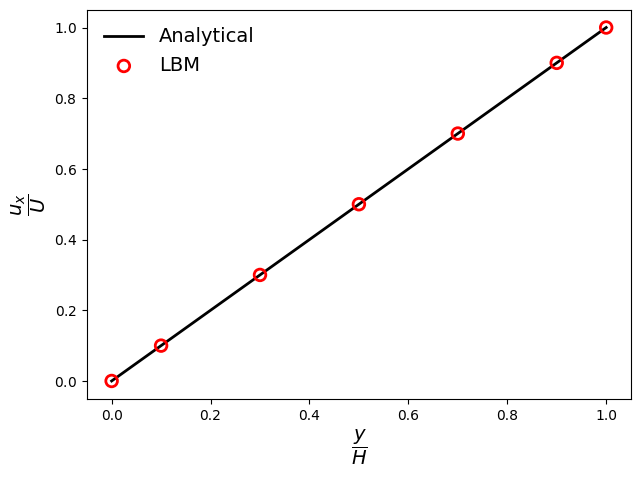

In [398]:
fig = plt.figure(2)
ax = fig.add_axes([0.14, 0.18, 0.85, 0.81])
ax.plot(y_plot / H, u_an / u_plate, linewidth=2, color="black",
        label=r"Analytical", zorder=0)
ax.scatter(y_plot / H, ux[Nx//2, :] / u_plate, s=70, linewidth=2,
           facecolor="none", edgecolor="red", label=r"LBM")
ax.set_xlabel(r"$\dfrac{y}{H}$", fontsize=14, zorder=1)
ax.set_ylabel(r"$\dfrac{u_x}{U}$", fontsize=14)
ax.get_yaxis().set_major_formatter(ScalarFormatter(useOffset=True, useMathText=True))
ax.ticklabel_format(axis="y", style="sci", scilimits=(-2, 2))
ax.legend(loc="best", frameon=False, fontsize=14)
plt.savefig("output_nonD.pdf")
plt.show()

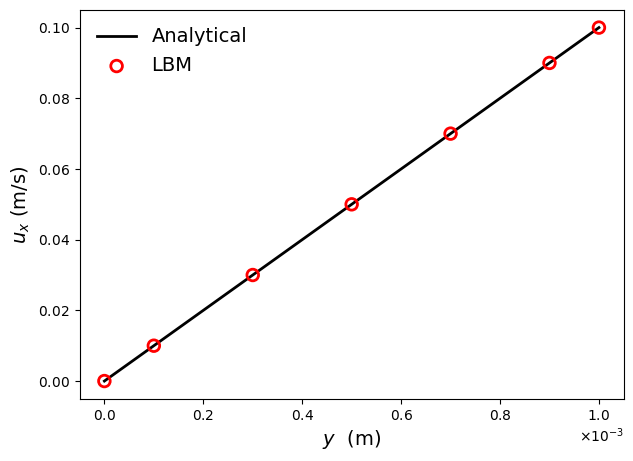

In [399]:
fig = plt.figure(2)
ax = fig.add_axes([0.14, 0.18, 0.85, 0.81])
ax.plot(y_plot / H * 1e-3, u_an / u_plate * 1e-1, linewidth=2, color="black",
        label=r"Analytical", zorder=0)
ax.scatter(y_plot / H * 1e-3, ux[Nx//2, :] / u_plate * 1e-1, s=70, linewidth=2,
           facecolor="none", edgecolor="red", label=r"LBM")
ax.set_xlabel(r"$y$  (m)", fontsize=14, zorder=1)
ax.set_ylabel(r"$u_x$ (m/s)", fontsize=14)
ax.get_yaxis().set_major_formatter(ScalarFormatter(useOffset=True, useMathText=True))
ax.ticklabel_format(axis="y", style="sci", scilimits=(-2, 2))
ax.get_xaxis().set_major_formatter(ScalarFormatter(useOffset=True, useMathText=True))
ax.ticklabel_format(axis="x", style="sci", scilimits=(-2, 2))
ax.legend(loc="best", frameon=False, fontsize=14)
plt.savefig("output_dimensional.pdf")
plt.show()